In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import zstandard as zstd

In [40]:
dir="../data/"
# _raw_df_channels = pd.read_csv(dir+"_raw_df_channels.tsv.gz", compression="infer", sep="\t")
df_timeseries_en = pd.read_csv(dir+"df_timeseries_en.tsv.gz", compression="infer", sep="\t")
df_channels_en = pd.read_csv(dir+"df_channels_en.tsv.gz", compression="infer", sep="\t")


In [41]:
df_channels_en.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


<Axes: xlabel='category_cc'>

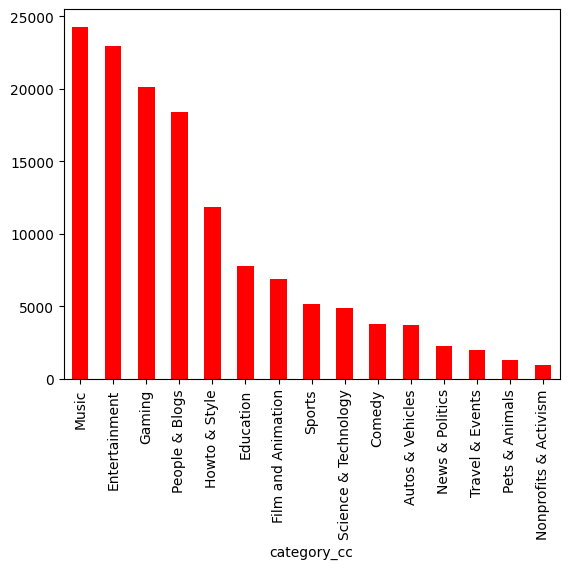

In [43]:
category_count=df_channels_en["category_cc"].value_counts()
category_count.plot(kind="bar", color="red")

In [44]:
df_channels_en_sports=df_channels_en[df_channels_en["category_cc"]=="Sports"]
print("The amount of sports channel:{}".format(df_channels_en_sports.shape[0]))
df_channels_en_sports.head(10)

The amount of sports channel:5148


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087
7,Sports,2009-03-17,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,45800000,213,14.0,2.087
203,Sports,2005-11-21,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,11900000,31357,323.0,2.087
266,Sports,2011-04-09,UCKvn9VBLAiLiYL4FFJHri6g,F2Freestylers - Ulti...,10700000,629,434.0,2.087
350,Sports,2011-02-01,UCI4fHQkguBNW3SwTqmehzjw,DALLMYD,9010000,488,578.0,2.087
383,Sports,2006-09-23,UCblfuW_4rakIf2h6aqANefA,Red Bull,8850000,5708,640.0,2.087
399,Sports,2006-02-06,UC14UlmYlSNiQCBe9Eookf_A,FC Barcelona,7987048,8145,667.0,2.087
435,Sports,2006-09-06,UCpcTrCXblq78GZrTUTLWeBw,FIFATV,8118460,8056,737.0,2.087
449,Sports,2009-03-11,UCqhnX4jA0A5paNd1v-zEysw,GoPro,7810000,2096,762.0,2.087
465,Sports,2006-03-04,UCvgfXK4nTYKudb0rFR6noLA,UFC - Ultimate Fight...,7570000,8258,798.0,2.087


<Axes: xlabel='join_date'>

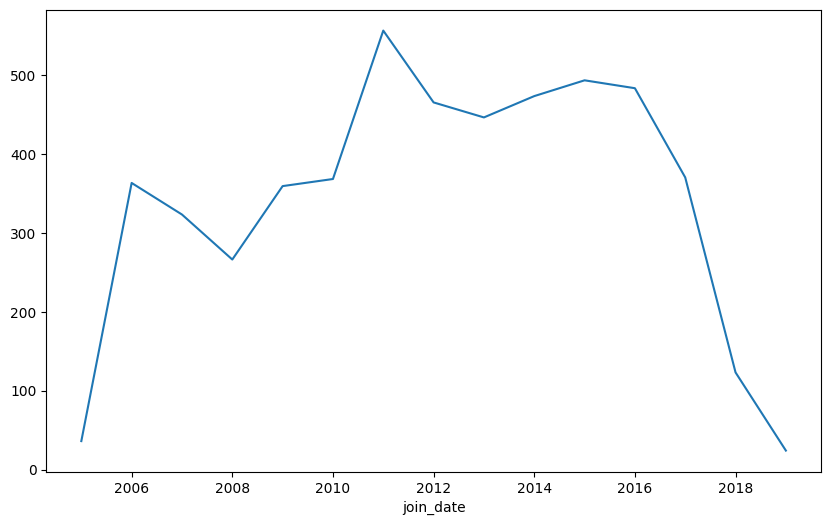

In [56]:
plt.figure(figsize=(10, 6))
date_time=pd.to_datetime(df_channels_en_sports["join_date"])

joint_date_counts_yearly=date_time.dt.year.value_counts().sort_index()
joint_date_counts_yearly.plot()


In [57]:
df_timeseries_en.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


<Axes: xlabel='category'>

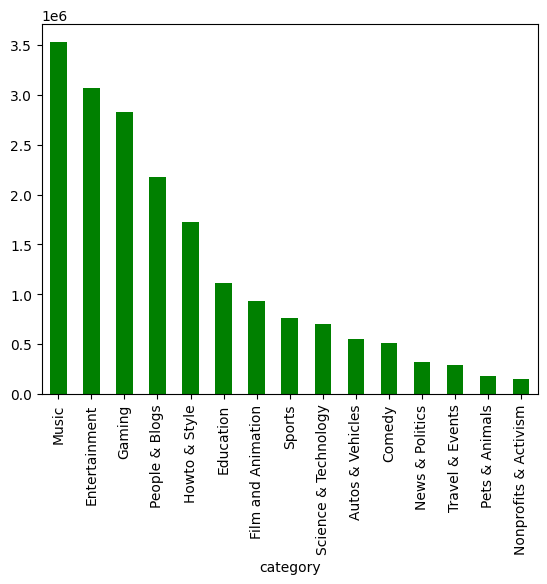

In [61]:
category_count_timeseries=df_timeseries_en["category"].value_counts()
category_count_timeseries.plot(kind="bar", color="green")

In [66]:
timeseries_sport=df_timeseries_en[df_timeseries_en["category"]=="Sports"]
print("The amount of spot category videos: {}".format(timeseries_sport.shape[0]))
timeseries_sport.head(10)

The amount of spot category videos: 762263


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
1339,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-02-08 00:00:00,2.649723e+06,6505.000000,3505.000000,0.000000,241,0,0
1340,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-02-15 00:00:00,2.661633e+06,11909.875000,3523.000000,18.000000,241,0,0
1341,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-02-22 00:00:00,2.674360e+06,12726.625000,3537.250000,14.250000,241,0,0
1342,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-02-29 00:00:00,2.687528e+06,13168.625000,3552.625000,15.375000,241,0,0
1343,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-03-07 00:00:00,2.701620e+06,14091.875000,3571.000000,18.375000,241,0,0
1344,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-03-14 00:00:00,2.716807e+06,15186.888889,3597.444444,26.444444,241,0,0
1345,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-03-21 00:00:00,2.732997e+06,16190.361111,3617.500000,20.055556,241,0,0
1346,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-03-28 01:00:00,2.748164e+06,15167.159302,3637.502326,20.002326,241,0,0
1347,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-04-04 01:00:00,2.763048e+06,14883.783406,3662.187500,24.685174,242,1,1
1348,UCNTpErdUqTDqWq7YG1nasOQ,Sports,2016-04-11 01:00:00,2.780435e+06,17386.859375,3692.255208,30.067708,242,0,1
